## **Import Library**

Import semua library yang dibutuhkan untuk menganalisa dataset, dimana dalam Chatbot kali ini kami menggunakan metode Deep Learning, yaitu Neural Network. Selain itu kami juga menggunakan model Long Short Term Memory (LSTM) dalam pengolahan teks, Chatbot dll. Library yang kami gunakan yaitu NumPy untuk komputasi matematika, Matplotlib untuk visualisasi model data, Natural Language Toolkit atau NLTK untuk pengolahan teks, Pandas untuk membaca data, dan library lainnya.

In [ ]:
import json
import nltk
import time
import random
import string
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import IPython.display as ipd
import matplotlib.pyplot as plt
from io import BytesIO
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D
from keras.layers import Dense, SimpleRNN
from keras.layers import Dense, GRU

## **Download NLTK Package**

Natural Language Toolkit (NLTK) adalah software open source python yang mendukung pengembangan NLP. Library NLTK merupakan tools NLP standar yang dikemabangkan untuk penelitian dan pendidikan.

In [ ]:
# Package sentence tokenizer
nltk.download('punkt')
# Package lemmatization
nltk.download('wordnet')
# Package multilingual wordnet data
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## **Load Dataset JSON**

Setelah import library, tahapan selanjutnya adalah me-load dataset yang telah disediakan. Dataset yang digunakan berupa format **.json** yang sangat cocok untuk membuat model Chatbot.

Data Json merupakan data yang termasuk dalam *semi structured* yang dimana data ini menampung beberapa bagian data seperti **tag**, **pattern**, **context**, dan **response**.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
with open ('/content/drive/MyDrive/Colab Notebooks/STYLEBOT/dataset/chatbot.json') as content:
  data1 = json.load(content)
tags = []
inputs = []
responses = {}
words = []
classes = []
documents = []
ignore_words = ['?', '!']

for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

## **Menampilkan Dataset**

Dataset yang kami buat terdiri dari 134 baris dan 2 kolom

In [ ]:
data

,patterns,tags
0,hallo,greeting
1,p,greeting
2,hai,greeting
3,halo,greeting
4,hei,greeting
...,...,...
118,Bye Bye,terimakasih
119,sampai jumpa,terimakasih
120,arigatou,terimakasih
121,by,terimakasih


## **Preprocessing Data**

Setelah kita meload data dan mengonversi data json menjadi dataframe. Tahapan selanjutnya adalah praproses pada dataset yang kita gunakan saat ini yaitu dengan cara:

1.   Remove Punctuations (Menghapus Punktuasi)
2.   Lematization (Lematisasi)
3.   Tokenization (Tokenisasi)
4.   Apply Padding (Padding)
5.   Encoding the Outputs (Konversi Keluaran Enkoding)

Kelima tahapan pemrosesan teks ini dijelaskan pada bagian langkah selanjutnya.

## **Remove Punctuations**

Tahapan praproses pada data teks yang pertama adalah menghapus punktuasi atau tanda baca seperti *special character* yaitu **'!'** (**tanda seru**) **','** (**tanda koma**) **'.'** (**tanda titik sebagai berhenti**) '**?**' (**tanda tanya**) dan tanda baca yang lain. Tahapan ini gunanya untuk mempermudah pemrosesan data teks yang akan kita olah.

In [ ]:
# Removing Punctuations (Menghilangkan Punktuasi)
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

## **Lemmatization**

Lemmatisasi atau Lemmatization adalah proses dimana merujuk pada melakukan sesuatu menggunakan vocabulary atau kosakata dan analisis morfologi kata-kata untuk menghilangkan *inflectional endings only* dan untuk mengembalikan bentuk *dictionary* (kata dalam kamus) dari sebuah kata yang dikenal sebagai ***lemma***.

In [ ]:
# Lematisasi atau Lemmatization
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower())for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(words), "unique lemmatized words", words)

132 unique lemmatized words ['.', 'ada', 'afternoon', 'android', 'ap', 'apa', 'apakah', 'apasih', 'aplikasi', 'aplikasinya', 'arigatou', 'asing', 'atau', 'bagus', 'bahasa', 'baju', 'banyak', 'baru', 'berkualitas', 'bisa', 'bisakah', 'bro', 'bukan', 'butuh', 'by', 'bye', 'celana', 'cocok', 'cuma', 'dadah', 'dah', 'dalam', 'dengan', 'di', 'didukung', 'digunakan', 'dijalankan', 'dulu', 'ga', 'gabisa', 'gatau', 'gaun', 'good', 'hai', 'hallo', 'halo', 'hangat', 'hanya', 'hei', 'helo', 'hi', 'hitam', 'hy', 'indo', 'indonesia', 'ingin', 'ini', 'io', 'itu', 'jaket', 'jelasin', 'jelek', 'jumpa', 'kacamata', 'kaos', 'kasih', 'kawan', 'kembali', 'kompatibel', 'lagi', 'lain', 'lainnya', 'makasih', 'malam', 'mana', 'membeli', 'memuaskan', 'mencari', 'mengapa', 'mini', 'morning', 'night', 'nyaman', 'nyediain', 'olahraga', 'oleh', 'p', 'pagi', 'pake', 'panjang', 'pendek', 'pendukung', 'pke', 'platform', 'rekomendasi', 'rekomendasikan', 'rendah', 'rok', 'saja', 'sampai', 'sangat', 'saya', 'sedang', 's

## **Mengurutkan Data Kelas Tags**

Pada tahap ini kita mengurutkan data kelas tags dari sesuai urutan Alfabet

In [ ]:
# sort classes
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

16 classes ['bahasa yang didukung', 'baju', 'celana panjang', 'celana pendek', 'gaun', 'greeting', 'jaket', 'kacamata', 'kaos', 'ketersediaan platform', 'rok', 'sepatu', 'sweater', 'tentang aplikasi', 'terimakasih', 'ugly aps']


## **Mencari Jumlah Keseluruhan Teks Data**

Pada tahap ini dicari jumlah dari kalimat dataset

In [ ]:
# documents = combination between patterns and intents
print (len(documents), "documents")

1423 documents


## **Tokenization**


Tokenisasi adalah suatu proses memberikan urutan karakter dan sebuah unit dokumen terdefinisi. Tokenisasi juga merupakan tugas untuk memecah kalimat menjadi bagian-bagian yang disebut dengan '**Token**' dan menghilangkan bagian tertentu seperti tanda baca.

Tokenizer(num_words=2000) berfungsi untuk menyimpan kata yang paling sering muncul dari keseluruhan data yaitu  yang disimpan maksimal sampai 2000 kata.


In [ ]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [42],
 [43],
 [44],
 [45],
 [81],
 [46],
 [82],
 [83],
 [84],
 [21, 42],
 [21, 44],
 [21, 46],
 [22, 43],
 [22, 85],
 [22, 45],
 [86],
 [2, 47, 3, 12],
 [48, 12],
 [2, 47, 12],
 [3, 48, 12],
 [12, 87, 88],
 [36, 89, 49, 12],
 [1, 90, 12],
 [91, 49, 12],
 [12],
 [13, 23, 8, 1],
 [1, 14, 23, 37],
 [23, 2, 4, 15, 9],
 [5, 23],
 [1, 92, 19, 37],
 [13, 19, 4, 24],
 [38, 5, 19, 93],
 [19, 2, 4, 50, 9],
 [5, 19],
 [1, 94, 95, 25, 37],
 [38, 5, 25, 4, 24],
 [25, 2, 4, 50, 9],
 [5, 25],
 [13, 26, 8, 1],
 [1, 14, 26, 51],
 [26, 2, 4, 15, 9],
 [5, 26],
 [13, 10, 20, 8, 1],
 [1, 14, 10, 20, 4, 96],
 [10, 20, 2, 4, 15, 9],
 [5, 10, 20],
 [5, 10],
 [13, 10, 27, 8, 1],
 [1, 14, 10, 27, 8, 52],
 [10, 27, 2, 4, 15, 9],
 [5, 10, 20],
 [5, 10, 27],
 [13, 28, 8, 1],
 [1, 14, 28, 97],
 [28, 2, 4, 15, 9],
 [5, 28],
 [13, 29, 8, 1],
 [1, 14, 29, 98],
 [29, 2, 4, 15, 9],
 [5, 29],
 [13, 30, 8, 1],
 [1, 14, 30, 52],
 [30, 2, 4, 15, 9],
 [5, 30],
 [13, 31, 8, 1]

## **Menampilkan Padding**

Padding juga adalah proses untuk membuat setiap kalimat pada teks memiliki panjang yang seragam. Sama seperti melakukan resize gambar, agar resolusi setiap gambar sama besar. Untuk menggunakan padding bisa impor library **pad_sequence**. Kemudian buat panggil fungsi pad_sequence() dan masukkan sequence hasil tokenisasi sebagai parameternya.

Singkatnya padding menambahkan angka 0 agar panjang nya sama dari tokenizer


In [ ]:
# Terapkan padding
x_train = pad_sequences ( train )
print ( x_train ) # Padding Sequences

[[  0   0   0   0   0   0   0  74]
 [  0   0   0   0   0   0   0  75]
 [  0   0   0   0   0   0   0  76]
 [  0   0   0   0   0   0   0  77]
 [  0   0   0   0   0   0   0  78]
 [  0   0   0   0   0   0   0  79]
 [  0   0   0   0   0   0   0  80]
 [  0   0   0   0   0   0   0  42]
 [  0   0   0   0   0   0   0  43]
 [  0   0   0   0   0   0   0  44]
 [  0   0   0   0   0   0   0  45]
 [  0   0   0   0   0   0   0  81]
 [  0   0   0   0   0   0   0  46]
 [  0   0   0   0   0   0   0  82]
 [  0   0   0   0   0   0   0  83]
 [  0   0   0   0   0   0   0  84]
 [  0   0   0   0   0   0  21  42]
 [  0   0   0   0   0   0  21  44]
 [  0   0   0   0   0   0  21  46]
 [  0   0   0   0   0   0  22  43]
 [  0   0   0   0   0   0  22  85]
 [  0   0   0   0   0   0  22  45]
 [  0   0   0   0   0   0   0  86]
 [  0   0   0   0   2  47   3  12]
 [  0   0   0   0   0   0  48  12]
 [  0   0   0   0   0   2  47  12]
 [  0   0   0   0   0   3  48  12]
 [  0   0   0   0   0  12  87  88]
 [  0   0   0   0  3

## **Encoding Text**

Encoding merupakan suatu konversi atau pengkodean yang dimana data kategorik seperti huruf atau data teks menjadi data numerik atau angka menyesuaikan dengan data label yang digunakan. Pada proses tahapan ini, encoding mengubah data teks pada kolom data tags menjadi data numerik dengan bahasa biner komputer yaitu 0 dan 1.

Encoding singkatnya adalah mengubah data teks menjadi angka. Tujuan dari encoding ini adalah mempermudah saat proses komputasi data teks dan modelling

In [ ]:
# Encoding the outputs
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
print(y_train)

[ 5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5 13
 13 13 13 13 13 13 13 13  8  8  8  8  1  1  1  1  1  4  4  4  4  6  6  6
  6  2  2  2  2  2  3  3  3  3  3 10 10 10 10  7  7  7  7 11 11 11 11 12
 12 12 12  0  0  0  0  0  0  0  0  0  0  0  9  9  9  9  9  9  9  9  9  9
 15 15 15 15 15 15 15 15 15 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14]


## **Input Length, Output Length and Vocabulary**

In [ ]:
# input length
input_shape = x_train.shape[1]
print(input_shape)

8


In [ ]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

# output length
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  131
output length:  16


## **Save Model Words & Classes**

Setelah dilakukan Preprocessing data selanjutnya kita bisa menyimpan hasil atau model Preprocessing data tersebut dengan menggunakan format pickle.
Pickle adalah sebuah modul pada standard library python, yang dapat digunakan untuk menyimpan dan membaca data ke dalam /dari sebuah file.

In [ ]:
pickle.dump(words, open('/content/drive/MyDrive/Colab Notebooks/STYLEBOT/model/words.pkl','wb'))
pickle.dump(classes, open('/content/drive/MyDrive/Colab Notebooks/STYLEBOT/model/classes.pkl','wb'))

## **Save Label Encoder & Tokenizer**

In [ ]:
pickle.dump(le, open('/content/drive/MyDrive/Colab Notebooks/STYLEBOT/model/le.pkl','wb'))
pickle.dump(tokenizer, open('/content/drive/MyDrive/Colab Notebooks/STYLEBOT/model/tokenizers.pkl','wb'))

## **Modelling**

Pada proyek kali ini kami menggunakan algoritma Neural Network atau Jaringan Syaraf Tiruan dengan algoritma LSTM (Long Short Term Memory).
LSTM (Long Short Term Memory) adalah algoritma deep learning cocok digunakan untuk membuat prediksi dan klasifikasi yang berhubungan dengan data teks.

Disini kami menggunkan 5 layer :
1. Layer input
2. Layer Embedding
3. Layer LSTM
4. Layer Flatten
5. Layer Dense

Dengan kompilasi model menggunakan sparse categorical crossentropy dan adam optimizer.

In [ ]:
# Creating the model (Membuat Modeling)
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,20)(i) # Layer Embedding
x = LSTM(20, return_sequences=True)(x) # Layer Long Short Term Memory
x = Flatten()(x) # Layer Flatten
x = Dense(output_length, activation="softmax")(x) # Layer Dense
model  = Model(i,x)

# Compiling the model (Kompilasi Model)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

## **Visualization**

Menampilkan hasil visualisasi dari modelling menggunakan plot

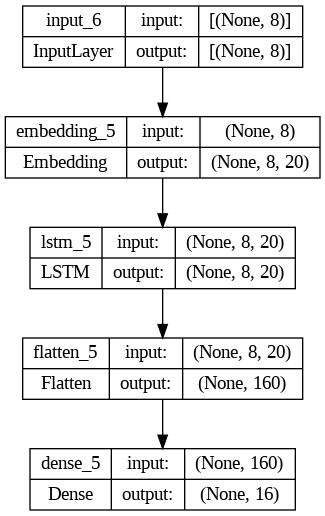

In [ ]:
# Visualization Plot Architecture Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='/content/drive/MyDrive/Colab Notebooks/STYLEBOT/model/model_plot.png', show_shapes=True, show_layer_names=True)

## **Parameter Model**

In [ ]:
# Menampilkan Parameter Model
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 8)]               0         
                                                                 
 embedding_5 (Embedding)     (None, 8, 20)             2640      
                                                                 
 lstm_5 (LSTM)               (None, 8, 20)             3280      
                                                                 
 flatten_5 (Flatten)         (None, 160)               0         
                                                                 
 dense_5 (Dense)             (None, 16)                2576      
                                                                 
Total params: 8496 (33.19 KB)
Trainable params: 8496 (33.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Training Model**

Melatih model sampai 300 kali agar mendapat akurasi yang tinggi

In [ ]:
# Training model (Latih data model sampai 300 kal i)
train = model.fit  (  x_train  ,   y_train  ,   epochs=  300 )

Epoch 1/300
4/4 [==============================] - 3s 106ms/step - loss: 2.7666 - accuracy: 0.0244
Epoch 2/300
4/4 [==============================] - 0s 73ms/step - loss: 2.7546 - accuracy: 0.1870
Epoch 3/300
4/4 [==============================] - 0s 70ms/step - loss: 2.7412 - accuracy: 0.1951
Epoch 4/300
4/4 [==============================] - 0s 70ms/step - loss: 2.7270 - accuracy: 0.1707
Epoch 5/300
4/4 [==============================] - 0s 44ms/step - loss: 2.7079 - accuracy: 0.1463
Epoch 6/300
4/4 [==============================] - 0s 39ms/step - loss: 2.6856 - accuracy: 0.1463
Epoch 7/300
4/4 [==============================] - 0s 39ms/step - loss: 2.6528 - accuracy: 0.1463
Epoch 8/300
4/4 [==============================] - 0s 73ms/step - loss: 2.6146 - accuracy: 0.1463
Epoch 9/300
4/4 [==============================] - 0s 8ms/step - loss: 2.5692 - accuracy: 0.1463
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 2.5234 - accuracy: 0.1463
Epoch 11/300
4/4 [==

Setelah dilakukan training model, hasil akurasi nya mendapatkan 0.9919 atau sebesar 99% dengan loss 0.0333

## **Model Analysis**

Menampilkan hasil akurasi dari training model sebelumnya dan diimplementasikan kedalam sebuah plot

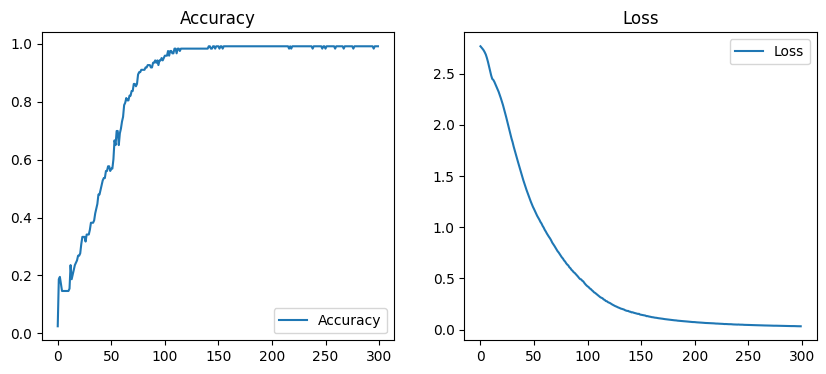

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'],label='Accuracy')
#plt.plot(train.history['val_accuracy'],label='Testing Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'],label='Loss')
#plt.plot(train.history['val_loss'],label='Testing Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

## **Testing Chatbot**

Setelah mengetahui hasil dari akurasi dan loss pada model yang telah ditetapkan dengan algoritma Neural Network dan LSTM. Maka, tahapan selanjutnya adalah menguji atau testing pada chatbot yang telah dilatih sebelumnya dan melihat apakah sesuai atau tidak pada saat kita masukan teks kalimat pertanyaannya.

Pada pengujian ini menggunakan metode input atau masukan sesuai dengan kalimat pertanyaan yang dimasukkan.

In [ ]:
# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('👩🏻/🧑🏻Kamu : ')

  # Menghapus punktuasi dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  # Mendapatkan hasil keluaran pada model
  output = model.predict(prediction_input)
  output = output.argmax()

  # Menemukan respon sesuai data tag
  response_tag = le.inverse_transform([output])[0]
  response = random.choice(responses[response_tag])

  # Periksa apakah responsnya berupa kamus (memiliki teks dan tautan) atau hanya teks
  if isinstance(response, dict):
    print("🤖 Chatbot : ", response['text'])
    print("Link", response['links'][0])  # Dengan asumsi setidaknya ada satu tautan
  else:
    print("🤖 Chatbot : ", response)

  # Tambahkan respon agar bot bisa berhenti
  if response_tag == "terimakasih":
    break


👩🏻/🧑🏻Kamu : p
1/1 [==============================] - 0s 378ms/step
🤖 Chatbot :  Hello! Bagaimana saya dapat membantu Anda dengan kebutuhan fashion Anda hari ini?
👩🏻/🧑🏻Kamu : stylebot itu apa
1/1 [==============================] - 0s 23ms/step
🤖 Chatbot :  Platform ini juga menyediakan artikel dan tips fashion, tutorial gaya, dan berbagai fitur menarik lainnya untuk memperkaya pengetahuan dan inspirasi fashion pengguna.
👩🏻/🧑🏻Kamu : rekomendasi baju
1/1 [==============================] - 0s 24ms/step
🤖 Chatbot :  Baju Atasan Kemeja Linen Rami // Ramona Crop Linen
Link https://shopee.co.id/Baju-Atasan-Kemeja-Linen-Rami-Ramona-Crop-Linen-i.79120906.12248312779
👩🏻/🧑🏻Kamu : thanks
1/1 [==============================] - 0s 19ms/step
🤖 Chatbot :  Selamat tinggal dan terimakasih! Semoga harimu penuh berkah.


##**Save the Model**

Setelah pengujian Chatbot telah disesuaikan dengan kalimat dan jawabannya. Maka, model chatbot bisa disimpan dengan format .h5 atau .pkl (pickle) untuk penggunaan aplikasi AI Chatbot dengan website atau sistem Android. Penyimpanan file model bisa langsung secara transient atau bisa taruh di Google Drive.

In [ ]:
# Simpan model dalam bentuk format file .h5 atau .pkl (pickle)
model.save('/content/drive/MyDrive/Colab Notebooks/STYLEBOT/model/chat_model.h5')

print('Model Created Successfully!')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model Created Successfully!
